In [282]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [326]:
img = cv2.imread("./more1.jpg")

In [327]:
kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype=np.float32)
imgLaplacian = cv2.filter2D(img, cv2.CV_32F, kernel)
floated = np.float32(img)
imgResult = floated - imgLaplacian

In [328]:
imgResult = np.clip(imgResult, 0, 255)
imgResult = imgResult.astype('uint8')
imgLaplacian = np.clip(imgLaplacian, 0, 255)
imgLaplacian = np.uint8(imgLaplacian)

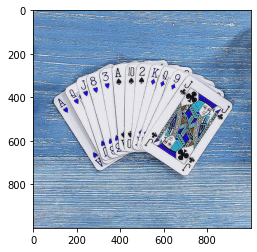

In [329]:
plt.imshow(imgResult)

In [330]:
bw = cv2.cvtColor(imgResult, cv2.COLOR_BGR2GRAY)
_, bw = cv2.threshold(bw, 40, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

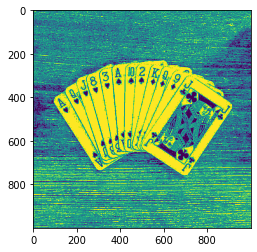

In [331]:
plt.imshow(bw)

In [332]:
dist = cv2.distanceTransform(bw, cv2.DIST_L2, 3)

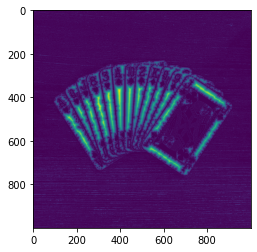

In [333]:
plt.imshow(dist)

In [334]:
_, distt = cv2.threshold(dist, 1.0, 1.0, cv2.THRESH_BINARY)

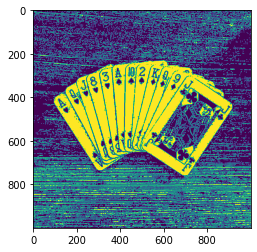

In [335]:
kernel1 = np.ones((2,2), dtype=np.uint8)
distt = cv2.dilate(distt, kernel1)
plt.imshow(distt)

In [336]:
distt = distt.astype('uint8')

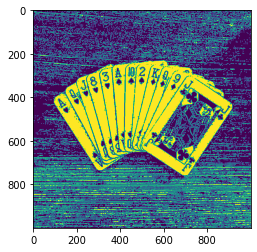

In [337]:
plt.imshow(distt)

In [338]:
contours, _ = cv2.findContours(distt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [339]:
markers = np.zeros(dist.shape, dtype=np.int32)

In [340]:
for i in range(len(contours)):
    cv2.drawContours(markers, contours, i, (i+1), -1)

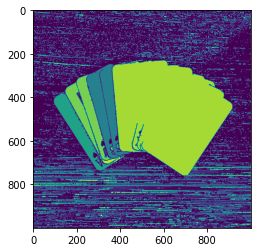

In [341]:
markers_8u = (markers * 10).astype('uint8')
plt.imshow(markers_8u)

In [342]:
cv2.watershed(imgResult, markers)

array([[  -1,   -1,   -1, ...,   -1,   -1,   -1],
       [  -1, 9286, 9286, ..., 9293, 9293,   -1],
       [  -1, 9286, 9286, ..., 9293,   -1,   -1],
       ...,
       [  -1,   54,   54, ...,   -1,   31,   -1],
       [  -1,   54,   54, ...,   31,   31,   -1],
       [  -1,   -1,   -1, ...,   -1,   -1,   -1]], dtype=int32)

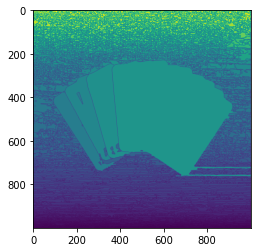

In [343]:
plt.imshow(markers)

-0.02728732 254.97272


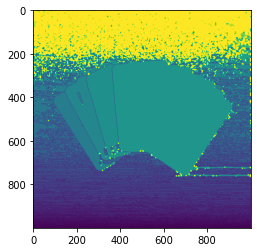

In [344]:
crnimg = markers.astype('float32')
crnimg= crnimg/(np.max(crnimg) - np.min(crnimg))*255
dst = cv2.cornerHarris(crnimg,5,7,0.04)
dst = cv2.dilate(dst,None)
print(np.min(crnimg), np.max(crnimg))
crnimg[dst>0.01*dst.max()]=[255]
plt.imshow(crnimg)